In [84]:
import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from scipy.stats import gaussian_kde
import seaborn as sns
import re

import importlib
import toylosses
importlib.reload(toylosses)
import toynn
importlib.reload(toynn)
import toyvis
importlib.reload(toyvis)

import torch
sns.set()

DEVICE = 'cuda'
OUTPUT = '/scratch/users/nmiolane/toyoutput'

# Decide on experiment's configuration

layers.0.weight tensor([[ 0.6000],
        [-0.7000]], device='cuda:0') 

layers.0.bias tensor([ 0.0000, -0.1000], device='cuda:0') 

layers.1.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.1.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.2.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.2.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.3.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.3.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.4.weight tensor([[ 50.,   0.],
        [  0., -40.]], device='cuda:0') 

layers.4.bias tensor([2.0000, 2.4000], device='cuda:0') 

layers.5.weight tensor([[0., 0.],
        [0., 0.]], device='cuda:0') 

layers.5.bias tensor([0., 0.], device='cuda:0') 



(0.3937482238905453,
 14.280675375129617,
 -3.4734722143018555,
 8.787599927100272)

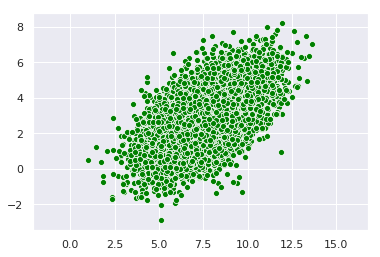

In [141]:
DATA_DIM = 2
LATENT_DIM = 1
N_DECODER_LAYERS = 5
NONLINEARITY = False
N_SAMPLES = 10000
WITH_BIASX = True
WITH_LOGVARX = True

W_TRUE = {}
B_TRUE = {}

W_TRUE[0] = [[0.6], [-0.7]]
B_TRUE[0] = [0., -0.1]

W_TRUE[1] = [[0.1, -0.1], [-0.1, .1]]
B_TRUE[1] = [0.1, 0.]

W_TRUE[2] = [[0.1, -0.1], [-0.1, .1]]
B_TRUE[2] = [0.1, 0.]

W_TRUE[3] = [[0.1, -0.1], [-0.1, .1]]
B_TRUE[3] = [0.1, 0.]

# For the reconstruction
W_TRUE[4] = [[50., 0.], [0., -40.]]
B_TRUE[4] = [2., 2.4]

# For the logvarx
W_TRUE[5] = [[0., 0.], [0., 0.]]
B_TRUE[5] = [0., 0.]

if WITH_LOGVARX:
    assert len(W_TRUE) == N_DECODER_LAYERS + 1, len(W_TRUE)
else:
    assert len(W_TRUE) == N_DECODER_LAYERS

WITH_BIASZ = True
WITH_LOGVARZ = True

decoder_true = toynn.make_decoder_true(
    w_true=W_TRUE, b_true=B_TRUE, latent_dim=LATENT_DIM, 
    data_dim=DATA_DIM, n_layers=N_DECODER_LAYERS,
    nonlinearity=NONLINEARITY, with_biasx=WITH_BIASX, with_logvarx=WITH_LOGVARX)

for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

generated_true_x = toynn.generate_from_decoder(decoder_true, N_SAMPLES)

fig, ax = plt.subplots()
ax = toyvis.plot_data(generated_true_x, color='green', label='from decoder true', ax=ax)
ax.axis('equal')

# Inspect generation of synthetic data from decoder_true

In [143]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

layers.0.weight tensor([[ 0.6000],
        [-0.7000]], device='cuda:0') 

layers.0.bias tensor([ 0.0000, -0.1000], device='cuda:0') 

layers.1.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.1.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.2.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.2.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.3.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.3.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.4.weight tensor([[ 50.,   0.],
        [  0., -40.]], device='cuda:0') 

layers.4.bias tensor([2.0000, 2.4000], device='cuda:0') 

layers.5.weight tensor([[0., 0.],
        [0., 0.]], device='cuda:0') 

layers.5.bias tensor([0., 0.], device='cuda:0') 



In [120]:
# TODO(nina): Add a comparison to a FA?

# Inspect results from standard VAE

-- True values of parameters
layers.0.weight tensor([[ 0.6000],
        [-0.7000]], device='cuda:0') 

layers.0.bias tensor([ 0.0000, -0.1000], device='cuda:0') 

layers.1.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.1.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.2.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.2.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.3.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.3.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.4.weight tensor([[ 50.,   0.],
        [  0., -40.]], device='cuda:0') 

layers.4.bias tensor([2.0000, 2.4000], device='cuda:0') 

layers.5.weight tensor([[0., 0.],
        [0., 0.]], device='cuda:0') 

layers.5.bias tensor([0., 0.], device='cuda:0') 


-- Learnt values of parameters
layers.0.weight tensor([[0.0584],
        [0.8375]], device='cuda:0') 

layers.0.bias tensor([ 

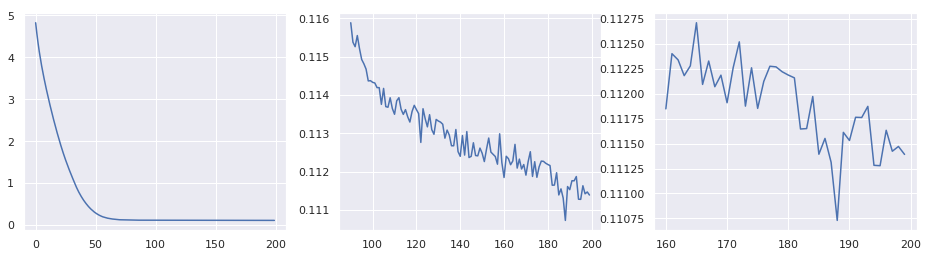

In [146]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

decoder_path = glob.glob(f'{OUTPUT}/train_vae/models/decoder.pth')[0]
decoder = torch.load(decoder_path, map_location=DEVICE)

print('-- True values of parameters')
for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

print('\n-- Learnt values of parameters')
for name, param in decoder.named_parameters():
    print(name, param.data, '\n')
    
losses_vae_path = glob.glob(f'{OUTPUT}/train_vae/train_losses.pkl')[0]
train_losses_all_epochs = pickle.load(open(losses_vae_path, 'rb'))

train_losses_total = [loss['total'] for loss in train_losses_all_epochs]
n_epochs = len(train_losses_total)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

ax = axes[0]
ax.plot(range(n_epochs), train_losses_total)

ax = axes[1]
ax.plot(range(90, n_epochs), train_losses_total[90:])

ax = axes[2]
ax.plot(range(160, n_epochs), train_losses_total[160:])

print('Last losses:')
print(train_losses_total[-5:])

(1.1825155656412, 14.64683101096897, -2.551395948319436, 8.082488809839951)

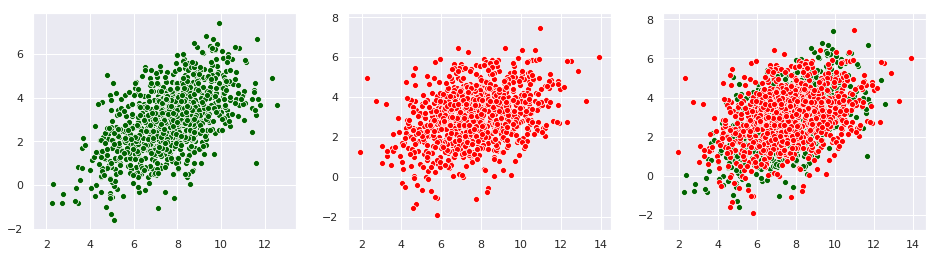

In [147]:
n_samples = 1000
generated_true_x = toynn.generate_from_decoder(decoder_true, n_samples)
generated_x = toynn.generate_from_decoder(decoder, n_samples)

# For 1D
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
axis_side = 20

ax = axes[0]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
ax.axis('equal')

ax = axes[1]
toyvis.plot_data(generated_x, color='red', ax=ax)
ax.axis('equal')

ax = axes[2]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
toyvis.plot_data(generated_x, color='red', ax=ax)
ax.axis('equal')

# Inspect results from VEM

-- True values of parameters
layers.0.weight tensor([[ 0.6000],
        [-0.7000]], device='cuda:0') 

layers.0.bias tensor([ 0.0000, -0.1000], device='cuda:0') 

layers.1.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.1.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.2.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.2.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.3.weight tensor([[ 0.1000, -0.1000],
        [-0.1000,  0.1000]], device='cuda:0') 

layers.3.bias tensor([0.1000, 0.0000], device='cuda:0') 

layers.4.weight tensor([[ 50.,   0.],
        [  0., -40.]], device='cuda:0') 

layers.4.bias tensor([2.0000, 2.4000], device='cuda:0') 

layers.5.weight tensor([[0., 0.],
        [0., 0.]], device='cuda:0') 

layers.5.bias tensor([0., 0.], device='cuda:0') 


-- Learnt values of parameters
layers.0.weight tensor([[ 0.0399],
        [-0.2628]], device='cuda:0') 

layers.0.bias tensor(

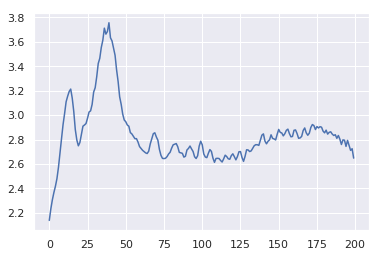

In [148]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

decoder_path = glob.glob(f'{OUTPUT}/train_vem/models/decoder.pth')[0]
decoder = torch.load(decoder_path, map_location=DEVICE)

print('-- True values of parameters')
for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

print('\n-- Learnt values of parameters')
for name, param in decoder.named_parameters():
    print(name, param.data, '\n')
    
losses_vae_path = glob.glob(f'{OUTPUT}/train_vem/train_losses.pkl')[0]
train_losses_all_epochs = pickle.load(open(losses_vae_path, 'rb'))

plt.figure()
train_losses_total = [loss['total'] for loss in train_losses_all_epochs]
n_epochs = len(train_losses_total)
plt.plot(range(n_epochs), train_losses_total)
print('Last losses:')
print(train_losses_total[-5:])

(2.277376258156189, 13.65253670175495, -7.122444828654034, 11.75983484224179)

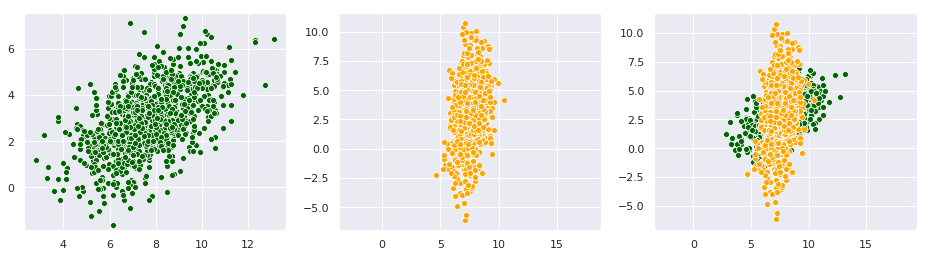

In [149]:
n_samples = 1000
generated_true_x = toynn.generate_from_decoder(decoder_true, n_samples)
generated_x = toynn.generate_from_decoder(decoder, n_samples)

# For 1D
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
axis_side = 20

ax = axes[0]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
ax.axis('equal')

ax = axes[1]
toyvis.plot_data(generated_x, color='orange', ax=ax)
ax.axis('equal')

ax = axes[2]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
toyvis.plot_data(generated_x, color='orange', ax=ax)
ax.axis('equal')

# Print pipeline logs

In [150]:
pattern = 'logs'
logs = []
for filename in os.listdir(OUTPUT):
    if re.search(pattern, filename):
        logs.append(filename)

print('Found %d log files.' % len(logs))
        
for filename in logs:
    path = os.path.join(OUTPUT, filename)
    print('\n-- Log file: %s\n' % filename)
    with open(path, 'r') as f:
        message = f.read()
    print(message)

Found 2 log files.

-- Log file: logs2019-04-09 23:57:27.267992.txt

2019-04-09 23:57:27,268 root         INFO     start
2019-04-09 23:57:27,282 luigi        INFO     logging configured by default settings
2019-04-09 23:57:27,307 luigi-interface DEBUG    Checking if RunAll() is complete
2019-04-09 23:57:27,308 luigi-interface DEBUG    Checking if TrainVAE() is complete
2019-04-09 23:57:27,308 luigi-interface DEBUG    Checking if TrainVEM() is complete
2019-04-09 23:57:27,309 luigi-interface INFO     Informed scheduler that task   RunAll__99914b932b   has status   PENDING
2019-04-09 23:57:27,310 luigi-interface DEBUG    Checking if MakeDataSet() is complete
2019-04-09 23:57:27,310 luigi-interface INFO     Informed scheduler that task   TrainVEM__99914b932b   has status   PENDING
2019-04-09 23:57:27,310 luigi-interface INFO     Informed scheduler that task   MakeDataSet__99914b932b   has status   DONE
2019-04-09 23:57:27,311 luigi-interface INFO     Informed scheduler that task   TrainVA